In [810]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def load_data():
    df_train=pd.read_csv('cs-training.csv',sep=',',header='infer')
#     df_train.drop(['Unnamed: 0'],inplace=True,axis=1)
    return df_train

print('读取csv原始样本数据')
df_train=load_data()
print('打印样本数据')

读取csv原始样本数据
打印样本数据


In [811]:
# df_train.head()


In [812]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [813]:
states={'SeriousDlqin2yrs':'好坏客户',
        'RevolvingUtilizationOfUnsecuredLines':'可用额度比值',
        'age':'年龄',
        'NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天笔数',
        'DebtRatio':'负债率',
        'MonthlyIncome':'月收入',
        'NumberOfOpenCreditLinesAndLoans':'信贷数量',
        'NumberOfTimes90DaysLate':'逾期90天笔数',
        'NumberRealEstateLoansOrLines':'固定资产贷款量',
        'NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天笔数',
        'NumberOfDependents':'家属数量'}
df_train.rename(columns=states,inplace=True)
df_train.head()    #修改英文字段名为中文字段名

,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [814]:
print(df_train['月收入'].isnull().sum())
print("月收入缺失比:{:.2%}".format(df_train['月收入'].isnull().sum()/df_train.shape[0]))
print(df_train['家属数量'].isnull().sum())
print("家属数量缺失比:{:.2%}".format(df_train['家属数量'].isnull().sum()/df_train.shape[0]))

# print(df_train[df_train['家属数量'].isnull()])

29731
月收入缺失比:19.82%
3924
家属数量缺失比:2.62%


In [815]:
'''
月收入缺失较大，使用平均值进行填充，家属数量缺失较少，将缺失的删掉，另外，如果字段缺失过大，将失去分析意义，可以将整个字段删除
'''

df_train=df_train.fillna({'月收入':df_train['月收入'].mean()})
df_train=df_train.dropna()
df_train.shape

(146076, 11)

In [816]:
#print("通过Boxplot观察每个变量的极值问题")

def outlier_check(df,c_name):
    p=df[[c_name]].boxplot(return_type='dict')
#     print(p)
#     print(type(p))
    x_outliers=p['fliers'][0].get_xdata()
#     print(type(x_outliers))
#     print('x_outliers:');print(x_outliers)
    y_outliers = p['fliers'][0].get_ydata()
#     print(type(y_outliers))
#     print('y_outliers:');print(y_outliers)
    for j in range(1):
#         print('j:',j)
        plt.annotate(y_outliers[j], xy=(x_outliers[j], y_outliers[j]), xytext=(x_outliers[j] + 0.02, y_outliers[j]))
    plt.show()  
    


变量【RevolvingUtilizationOfUnsecuredLines:可用额度比值】的极值图形分布如下


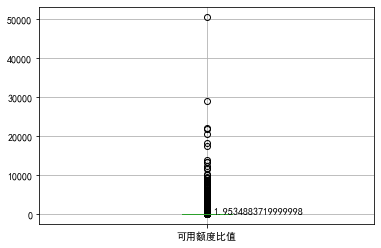

删除变量【RevolvingUtilizationOfUnsecuredLines:可用额度比值10000以上的记录


In [817]:
print("变量【RevolvingUtilizationOfUnsecuredLines:可用额度比值】的极值图形分布如下")
outlier_check(df_train,'可用额度比值')


print("删除变量【RevolvingUtilizationOfUnsecuredLines:可用额度比值10000以上的记录")
df_train=df_train[df_train['可用额度比值']<10000]

变量【age:年龄】的极值图形分布如下


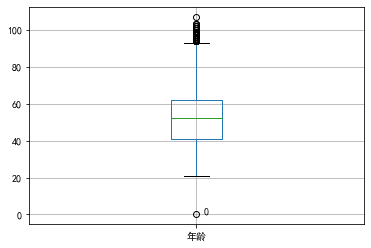

删除变量【age:年龄】0以及90以上的记录


In [818]:
print("变量【age:年龄】的极值图形分布如下")
outlier_check(df_train,'年龄')

print("删除变量【age:年龄】0以及90以上的记录")
df_train=df_train[np.logical_and(df_train['年龄']>0,df_train['年龄']<90)]
# df_train

变量【NumberOfTime30-59DaysPastDueNotWorse:逾期30-59天笔数】的极值图形分布如下


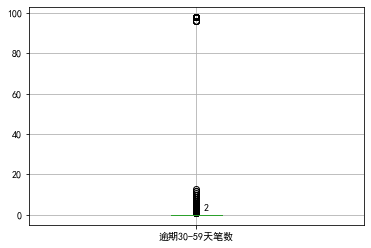

删除变量【NumberOfTime30-59DaysPastDueNotWorse:逾期30-59天笔数】20以上的记录


In [819]:
print("变量【NumberOfTime30-59DaysPastDueNotWorse:逾期30-59天笔数】的极值图形分布如下")
outlier_check(df_train,'逾期30-59天笔数')
print("删除变量【NumberOfTime30-59DaysPastDueNotWorse:逾期30-59天笔数】20以上的记录")
df_train = df_train[df_train['逾期30-59天笔数'] <20]

变量【DebtRatio:负债率】的极值图形分布如下


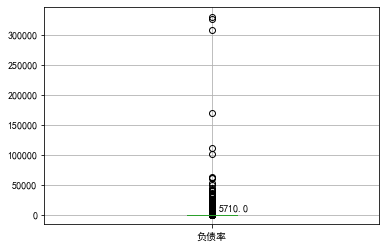

删除变量【DebtRatio:负债率】50000以上的记录


In [820]:
print("变量【DebtRatio:负债率】的极值图形分布如下")
outlier_check(df_train,'负债率')
print("删除变量【DebtRatio:负债率】50000以上的记录")
df_train = df_train[df_train['负债率']<50000]

变量【MonthlyIncome:月收入】的极值图形分布如下


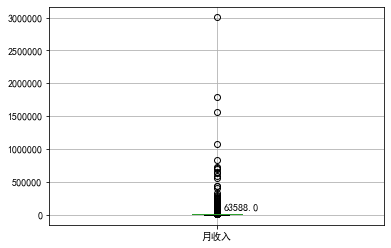

删除变量【MonthlyIncome:月收入】50000以上的记录


In [821]:
print("变量【MonthlyIncome:月收入】的极值图形分布如下")
outlier_check(df_train,'月收入')
print("删除变量【MonthlyIncome:月收入】50000以上的记录")
df_train = df_train[df_train['月收入']<500000]

变量【NumberOfOpenCreditLinesAndLoans:信贷数量】的极值图形分布如下
考虑到业务需要，我们认为这些借款机构特别多的人有欺诈的可能，因此我们这里不删除变量【NumberOfOpenCreditLinesAndLoans】的极值


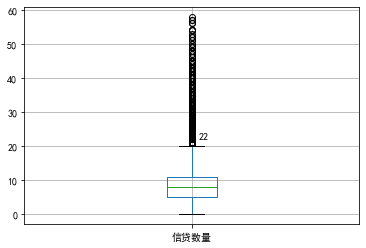

In [822]:
print("变量【NumberOfOpenCreditLinesAndLoans:信贷数量】的极值图形分布如下")
print("考虑到业务需要，我们认为这些借款机构特别多的人有欺诈的可能，因此我们这里不删除变量【NumberOfOpenCreditLinesAndLoans】的极值")
outlier_check(df_train,'信贷数量')

变量【NumberOfTimes90DaysLate:逾期90天笔数】的极值图形分布如下


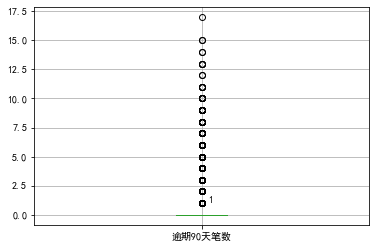

删除变量【NumberOfTimes90DaysLate:逾期90天笔数】20以上的记录


In [823]:
print("变量【NumberOfTimes90DaysLate:逾期90天笔数】的极值图形分布如下")
outlier_check(df_train,'逾期90天笔数')
print("删除变量【NumberOfTimes90DaysLate:逾期90天笔数】20以上的记录")
df_train = df_train[df_train['逾期90天笔数']<20]
# df_train['NumberOfTimes90DaysLate']

变量【NumberRealEstateLoansOrLines:固定资产贷款量】的极值图形分布如下


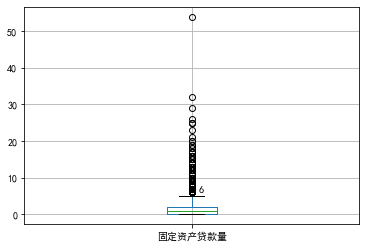

删除变量【NumberRealEstateLoansOrLines:固定资产贷款量】6以上的记录


In [824]:
print("变量【NumberRealEstateLoansOrLines:固定资产贷款量】的极值图形分布如下")
outlier_check(df_train,'固定资产贷款量')
print("删除变量【NumberRealEstateLoansOrLines:固定资产贷款量】6以上的记录")
df_train = df_train[df_train['固定资产贷款量']<6]

变量【NumberOfTime60-89DaysPastDueNotWorse:逾期60-89天笔数】的极值图形分布如下


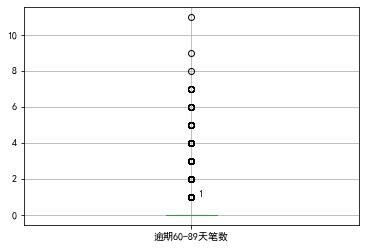

删除变量【NumberOfTime60-89DaysPastDueNotWorse:逾期60-89天笔数】20以上的记录


In [825]:
print("变量【NumberOfTime60-89DaysPastDueNotWorse:逾期60-89天笔数】的极值图形分布如下")
outlier_check(df_train,'逾期60-89天笔数')
print("删除变量【NumberOfTime60-89DaysPastDueNotWorse:逾期60-89天笔数】20以上的记录")
df_train = df_train[df_train['逾期60-89天笔数']<20]

变量【NumberOfDependents:家属数量】的极值图形分布如下


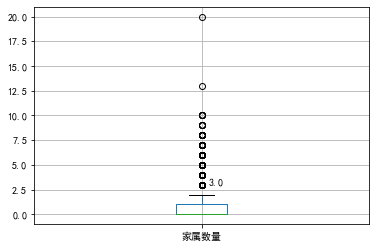

删除变量【NumberOfDependents:家属数量】3以上的记录


In [826]:
print("变量【NumberOfDependents:家属数量】的极值图形分布如下")
outlier_check(df_train,'家属数量')
print("删除变量【NumberOfDependents:家属数量】3以上的记录")
df_train = df_train[df_train['家属数量']<3]

In [827]:
#处理缺失值
print("开始处理缺失值")
def check_na(df):
    print(df.count(axis=0))

开始处理缺失值


In [828]:
print("检查缺失值的分布:\n")
check_na(df_train)

检查缺失值的分布:

好坏客户          131225
可用额度比值        131225
年龄            131225
逾期30-59天笔数    131225
负债率           131225
月收入           131225
信贷数量          131225
逾期90天笔数       131225
固定资产贷款量       131225
逾期60-89天笔数    131225
家属数量          131225
dtype: int64


In [829]:
print("通过 len(df_train) 方法得出去除极值后没有缺失值的样本数量为："+str(len(df_train)))

通过 len(df_train) 方法得出去除极值后没有缺失值的样本数量为：131225


In [830]:
df_train.to_csv('cs_train_data_new.csv')
# df_train.index.tolist()

In [831]:
#抽取样本代码
def data_sample(inputX,index,test_Ratio=0.2):
    from random import sample
    data_array=np.atleast_1d(inputX)
    class_array=np.unique(data_array)
    test_list=[]
    train_list=[]
    for c in class_array:
        temp=[]
        for i,value in enumerate(data_array):
            if value==c:
                temp.append(index[i])
        test_list.extend(sample(temp,int(len(temp)*test_Ratio)))
    return list(set(index) - set(test_list)), test_list

def split_sample(df_train):
    train_list,test_list=data_sample(df_train['好坏客户'].tolist(),df_train.index.tolist())
    df_train_section=df_train.loc[train_list,:]
    df_test_section=df_train.loc[test_list,:]
    return df_train_section,df_test_section

df_train,df_test=split_sample(df_train)


In [832]:
print("抽取样本")
writer=pd.ExcelWriter('split_train_result.xlsx')
df_train.to_excel(writer,'Train',index=False)
writer.save()

抽取样本


In [833]:
def WOE_Convert(input,sp,rank):
    result=[]
    for v in input:
        for i in range(len(sp)):
            if i<len(sp)-1:
                if v>=sp[i] and v<sp[i+1]:
                    result.append(rank[i])
                    break
            else:
                if v>=sp[i]:
                    result.append(rank[i])
                else:
                    result.append(np.NaN)
    return result

# df_train['RevolvingUtilizationOfUnsecuredLines']=WOE_Convert(df_train['RevolvingUtilizationOfUnsecuredLines'],[0,0.03,0.12,0.4,0.8],[-1.2614,-1.2615,-0.5676,0.3631,1.2785])
# df_train['age'] = WOE_Convert(df_train['age'],[0,40,50,60,70] ,[0.042,0.2259,-0.012,-0.5732,-0.9604])
# df_train['NumberOfTime30-59DaysPastDueNotWorse'] = WOE_Convert(df_train['NumberOfTime30-59DaysPastDueNotWorse'],[0,1,2] ,[-0.51757,0.8626,1.8545])
# df_train['DebtRatio'] = WOE_Convert(df_train['DebtRatio'],[0,1,2] ,[-0.02811,0.71398,-0.2327])
# df_train['MonthlyIncome'] = WOE_Convert(df_train['MonthlyIncome'],[0,1000,5000,10000] ,[-0.41436,0.2844,-0.15859,0.54148])
# df_train['NumberOfOpenCreditLinesAndLoans'] = WOE_Convert(df_train['NumberOfOpenCreditLinesAndLoans'],[0,5,8,13],[0.3140,-0.0993,-0.14208,-0.01537])
# df_train['NumberOfTimes90DaysLate'] = WOE_Convert(df_train['NumberOfTimes90DaysLate'], [0,1],[-0.35838,2.26282])
# df_train['NumberRealEstateLoansOrLines'] = WOE_Convert(df_train['NumberRealEstateLoansOrLines'], [0,1,2],[0.2032,-0.2005,-0.0691])
# df_train['NumberOfTime60-89DaysPastDueNotWorse'] = WOE_Convert(df_train['NumberOfTime60-89DaysPastDueNotWorse'],[0,1],[-0.26171,2.006374])
# df_train['NumberOfDependents'] = WOE_Convert(df_train['NumberOfDependents'],[0,1,2],[-0.1252,0.1254,0.2252])

# df_test['RevolvingUtilizationOfUnsecuredLines']=WOE_Convert(df_test['RevolvingUtilizationOfUnsecuredLines'],[0,0.03,0.12,0.4,0.8],[-1.2614,-1.2615,-0.5676,0.3631,1.2785])
# df_test['age'] = WOE_Convert(df_test['age'],[0,40,50,60,70] ,[0.042,0.2259,-0.012,-0.5732,-0.9604])
# df_test['NumberOfTime30-59DaysPastDueNotWorse'] = WOE_Convert(df_test['NumberOfTime30-59DaysPastDueNotWorse'],[0,1,2] ,[-0.51757,0.8626,1.8545])
# df_test['DebtRatio'] = WOE_Convert(df_test['DebtRatio'],[0,1,2] ,[-0.02811,0.71398,-0.2327])
# df_test['MonthlyIncome'] = WOE_Convert(df_test['MonthlyIncome'],[0,1000,5000,10000] ,[-0.41436,0.2844,-0.15859,0.54148])
# df_test['NumberOfOpenCreditLinesAndLoans'] = WOE_Convert(df_test['NumberOfOpenCreditLinesAndLoans'],[0,5,8,13],[0.3140,-0.0993,-0.14208,-0.01537])
# df_test['NumberOfTimes90DaysLate'] = WOE_Convert(df_test['NumberOfTimes90DaysLate'], [0,1],[-0.35838,2.26282])
# df_test['NumberRealEstateLoansOrLines'] = WOE_Convert(df_test['NumberRealEstateLoansOrLines'], [0,1,2],[0.2032,-0.2005,-0.0691])
# df_test['NumberOfTime60-89DaysPastDueNotWorse'] = WOE_Convert(df_test['NumberOfTime60-89DaysPastDueNotWorse'],[0,1],[-0.26171,2.006374])
# df_test['NumberOfDependents'] = WOE_Convert(df_test['NumberOfDependents'],[0,1,2],[-0.1252,0.1254,0.2252])

# #计算df_train各个特征的方差和平均数，并对df_train中的X变量标准正太化
# Y_train=df_train['SeriousDlqin2yrs'].values.tolist()
# df_train_X=df_train.drop(['SeriousDlqin2yrs'],axis=1)
# std_series=df_train_X.std()
# mean_series=df_train_X.mean()
# df_train_X=df_train_X.add(mean_series).div(std_series)
# #计算df_test做同样的操作
# Y_test=df_test['SeriousDlqin2yrs'].values.tolist()
# df_test_X=df_test.drop(['SeriousDlqin2yrs'],axis=1)
# std_series=df_test_X.std()
# mean_series=df_test_X.mean()
# df_test_X=df_test_X.add(mean_series).div(std_series)

# Mcov=np.corrcoef(np.array(df_test_X).T)
# df_exl=pd.DataFrame(data=Mcov)
# writer=pd.ExcelWriter('cov_matrix.xlsx')
# df_exl.to_excel(writer,'cov',index=False)
# writer.save()

通过热力图判别变量之间的相关性,热力图如下:


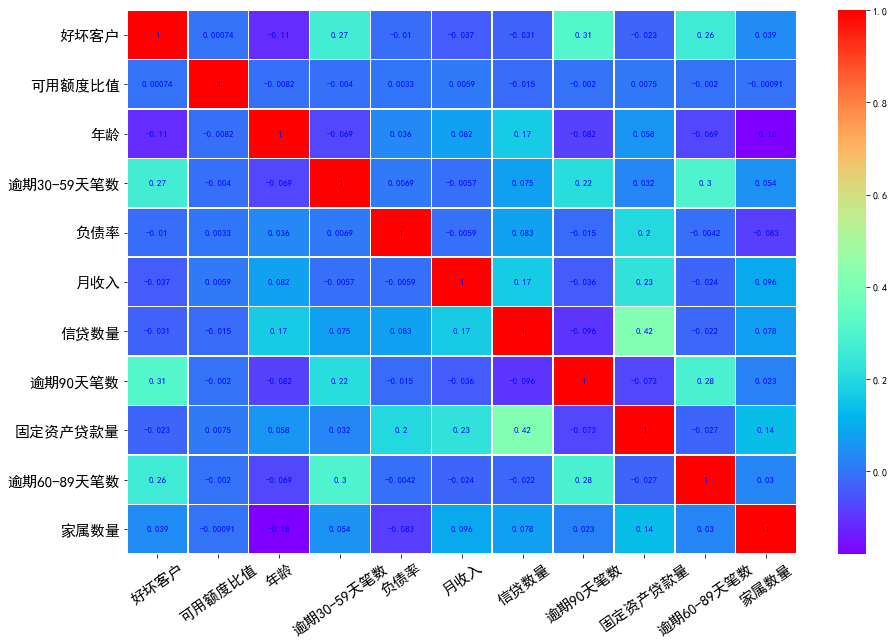

In [834]:
print("通过热力图判别变量之间的相关性,热力图如下:")
import pylab
pylab.mpl.rcParams['font.sans-serif'] = ['SimHei']#防止中文乱码
pylab.mpl.rcParams['axes.unicode_minus'] = False#防止中文乱码

corr = df_train.corr()
xticks = list(corr.index)#x轴标签
yticks = list(corr.index)#y轴标签
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap='rainbow', ax=ax1, linewidths=.5,annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'})#绘制相关性系数热力图
ax1.set_xticklabels(xticks, rotation=35, fontsize=15)
ax1.set_yticklabels(yticks, rotation=0, fontsize=15)
plt.show()

不同颜色的热力图,图如下:


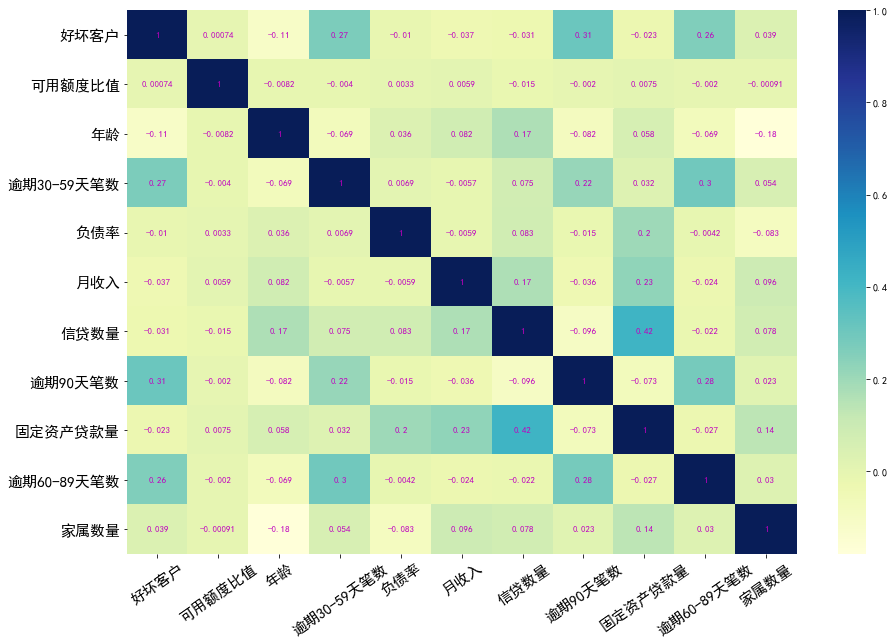

In [835]:
print("不同颜色的热力图,图如下:")
corr = df_train.corr()#计算各变量的相关性系数
xticks = list(corr.index) #x轴标签
yticks = list(corr.index)#y轴标签
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap='YlGnBu', ax=ax1, annot_kws={'size': 9, 'weight': 'bold', 'color': 'm'})#绘制相关性系数热力图
# ax1.set_xticklabels(xticks, rotation=0, fontsize=10)
# ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
ax1.set_xticklabels(xticks, rotation=35, fontsize=15)
ax1.set_yticklabels(yticks, rotation=0, fontsize=15)
plt.show()

In [836]:
print("单变量分析,分析年龄变量如下:")

单变量分析,分析年龄变量如下:


In [837]:
#单变量 分析案例
age_cut=pd.cut(df_train['年龄'],5)
print(type(age_cut))
print(age_cut)
age_cut_group=df_train['好坏客户'].groupby(age_cut).count()
age_cut_group

<class 'pandas.core.series.Series'>
1           (34.6, 48.2]
2           (34.6, 48.2]
3         (20.932, 34.6]
4           (48.2, 61.8]
5           (61.8, 75.4]
6           (48.2, 61.8]
7           (34.6, 48.2]
9           (48.2, 61.8]
10        (20.932, 34.6]
11          (48.2, 61.8]
12          (34.6, 48.2]
14          (75.4, 89.0]
15          (61.8, 75.4]
17          (48.2, 61.8]
18          (34.6, 48.2]
19        (20.932, 34.6]
20          (34.6, 48.2]
21          (34.6, 48.2]
23        (20.932, 34.6]
24          (48.2, 61.8]
25          (48.2, 61.8]
26          (48.2, 61.8]
28        (20.932, 34.6]
29          (48.2, 61.8]
30        (20.932, 34.6]
32          (61.8, 75.4]
34          (34.6, 48.2]
35          (61.8, 75.4]
36          (48.2, 61.8]
37          (61.8, 75.4]
               ...      
149956    (20.932, 34.6]
149958      (61.8, 75.4]
149959      (61.8, 75.4]
149960      (48.2, 61.8]
149961    (20.932, 34.6]
149962      (34.6, 48.2]
149963      (48.2, 61.8]
149964      (6

年龄
(20.932, 34.6]    14100
(34.6, 48.2]      27963
(48.2, 61.8]      32315
(61.8, 75.4]      23633
(75.4, 89.0]       6970
Name: 好坏客户, dtype: int64

In [838]:
#求各组的坏客户数
age_cut_grouped1=df_train["好坏客户"].groupby(age_cut).sum()
age_cut_grouped1

年龄
(20.932, 34.6]    1480
(34.6, 48.2]      2375
(48.2, 61.8]      1963
(61.8, 75.4]       721
(75.4, 89.0]       147
Name: 好坏客户, dtype: int64

In [839]:
#联结
df_train1=pd.merge(pd.DataFrame(age_cut_group),pd.DataFrame(age_cut_grouped1),left_index=True,right_index=True)
df_train1.rename(columns={'好坏客户_x':'总客户数','好坏客户_y':'坏客户数'},inplace=True)
df_train1

,总客户数,坏客户数
年龄,,
"(20.932, 34.6]",14100,1480
"(34.6, 48.2]",27963,2375
"(48.2, 61.8]",32315,1963
"(61.8, 75.4]",23633,721
"(75.4, 89.0]",6970,147


In [840]:
#加一列好客户数

df_train1.insert(2,"好客户数",df_train1["总客户数"]-df_train1["坏客户数"])
df_train1

,总客户数,坏客户数,好客户数
年龄,,,
"(20.932, 34.6]",14100,1480,12620
"(34.6, 48.2]",27963,2375,25588
"(48.2, 61.8]",32315,1963,30352
"(61.8, 75.4]",23633,721,22912
"(75.4, 89.0]",6970,147,6823


In [841]:
#再加一列坏客户占比

df_train1.insert(2,"坏客户占比",df_train1["坏客户数"]/df_train1["总客户数"])
df_train1

,总客户数,坏客户数,坏客户占比,好客户数
年龄,,,,
"(20.932, 34.6]",14100,1480,0.104965,12620
"(34.6, 48.2]",27963,2375,0.084934,25588
"(48.2, 61.8]",32315,1963,0.060746,30352
"(61.8, 75.4]",23633,721,0.030508,22912
"(75.4, 89.0]",6970,147,0.021090,6823


Text(0.5, 1.0, '年龄与好坏客户数分布图')

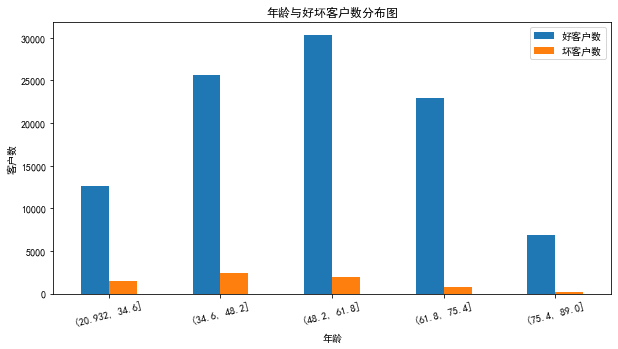

In [842]:
ax1=df_train1[["好客户数","坏客户数"]].plot.bar(figsize=(10,5))
ax1.set_xticklabels(df_train1.index,rotation=15)
ax1.set_ylabel("客户数")
ax1.set_title("年龄与好坏客户数分布图")

Text(0.5, 1.0, '坏客户率随年龄的变化趋势图')

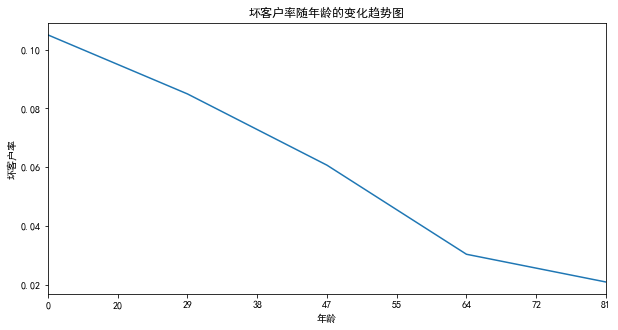

In [843]:
ax11=df_train1["坏客户占比"].plot(figsize=(10,5))
ax11.set_xticklabels([0,20,29,38,47,55,64,72,81,89,98,107])
ax11.set_ylabel("坏客户率")
ax11.set_title("坏客户率随年龄的变化趋势图")

In [844]:
#异常值处理
# import matplotlib.pyplot as plt
# from pylab import mpl

# mpl.rcParams['font.sans-serif'] = ['SimHei']
# x1=df_train['可用额度比值']
# x2=df_train['负债率']
# x3=df_train["年龄"]
# x4=df_train["逾期30-59天笔数"]
# x5=df_train["逾期60-89天笔数"]
# x6=df_train["逾期90天笔数"]
# x7=df_train["信贷数量"]
# x8=df_train["固定资产贷款量"]
# fig=plt.figure(figsize=(20,15))
# ax1=fig.add_subplot(221)
# ax2=fig.add_subplot(222)
# ax3=fig.add_subplot(223)
# ax4=fig.add_subplot(224)
# ax1.boxplot([x1,x2])
# ax1.set_xticklabels(["可用额度比值","负债率"], fontsize=20)
# ax2.boxplot(x3)
# ax2.set_xticklabels("年龄", fontsize=20)
# ax3.boxplot([x4,x5,x6])
# ax3.set_xticklabels(["逾期30-59天笔数","逾期60-89天笔数","逾期90天笔数"], fontsize=20)
# ax4.boxplot([x7,x8])
# ax4.set_xticklabels(["信贷数量","固定资产贷款量"], fontsize=20)

In [845]:
df_train=df_train[df_train['可用额度比值']<1]
df_train=df_train[df_train['年龄']>0]
df_train=df_train[df_train['逾期30-59天笔数']<80]
df_train=df_train[df_train['逾期60-89天笔数']<80]
df_train=df_train[df_train['逾期90天笔数']<80]
df_train=df_train[df_train['固定资产贷款量']<50]
df_train.shape

(102694, 11)

In [846]:
#使用python自动分箱woe转化
bins1=[0,0.1,0.5,0.85,1.0]
cut1=pd.qcut(df_train["可用额度比值"],bins1,labels=False)
print(type(cut1))
# print(cut1)
print(pd.value_counts(cut1))



<class 'pandas.core.series.Series'>
1    41077
2    35943
3    15404
0    10270
Name: 可用额度比值, dtype: int64


In [847]:
bins2=[0,20,30,40,50,60,70,80,90]
cut2=pd.qcut(df_train["年龄"],8,labels=False,duplicates='drop')
print(pd.value_counts(cut2))


1    14002
0    13474
2    13130
5    12777
7    12572
6    12375
4    12256
3    12108
Name: 年龄, dtype: int64


In [848]:
bins3=[-1,0,1,3,5,13]
cut3=pd.cut(df_train["逾期30-59天笔数"],bins3,labels=False)
# print(cut3)
print(pd.value_counts(cut3))
# cut3.value_counts()


0    87714
1    10398
2     3821
3      632
4      129
Name: 逾期30-59天笔数, dtype: int64


In [849]:
bins4=[0,10,10000,13000]
cut4=pd.qcut(df_train["负债率"],3,labels=False,duplicates='drop')
print(pd.value_counts(cut4))
bins5=[0,1000,10000,100000,310000]
cut5=pd.qcut(df_train["月收入"],4,labels=False,duplicates='drop')
print(pd.value_counts(cut5))
bins6=[0,10,30,40,60]
cut6=pd.qcut(df_train["信贷数量"],4,labels=False,duplicates='drop')
print(pd.value_counts(cut6))

0    34232
2    34231
1    34231
Name: 负债率, dtype: int64
1    25778
0    25690
2    25617
3    25609
Name: 月收入, dtype: int64
0    31274
1    27153
3    23920
2    20347
Name: 信贷数量, dtype: int64


In [850]:
bins7=[-1, 0, 1, 3,5, 20]
cut7=pd.cut(df_train["逾期90天笔数"],bins7,labels=False)
print(pd.value_counts(cut7))
bins8=[-1, 0,1,2, 3, 33]
cut8=pd.cut(df_train["固定资产贷款量"],bins8,labels=False)
print(pd.value_counts(cut8))
bins9=[-1, 0, 1, 3, 12]
cut9=pd.cut(df_train["逾期60-89天笔数"],bins9,labels=False)
print(pd.value_counts(cut9))
bins10=[-1, 0, 1, 2]
cut10=pd.cut(df_train["家属数量"],bins10,labels=False)
print(pd.value_counts(cut10))

0    97844
1     3248
2     1277
3      231
4       94
Name: 逾期90天笔数, dtype: int64
0    38538
1    36291
2    21666
3     4272
4     1927
Name: 固定资产贷款量, dtype: int64
0    98293
1     3567
2      746
3       88
Name: 逾期60-89天笔数, dtype: int64
0    67167
1    20366
2    15161
Name: 家属数量, dtype: int64


In [851]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102694 entries, 1 to 149996
Data columns (total 11 columns):
好坏客户          102694 non-null int64
可用额度比值        102694 non-null float64
年龄            102694 non-null int64
逾期30-59天笔数    102694 non-null int64
负债率           102694 non-null float64
月收入           102694 non-null float64
信贷数量          102694 non-null int64
逾期90天笔数       102694 non-null int64
固定资产贷款量       102694 non-null int64
逾期60-89天笔数    102694 non-null int64
家属数量          102694 non-null float64
dtypes: float64(4), int64(7)
memory usage: 9.4 MB


In [852]:
print("好坏客户中【坏客户是1，好客户对应0】\n")


print("df_train['好坏客户']:"+str(df_train['好坏客户'].count()))

df_train_bad=df_train[df_train['好坏客户']==1]

bad=df_train_bad['好坏客户'].count()

print("bad:"+str(bad))
good=df_train['好坏客户'].count()-bad
print("good:"+str(good))
rs=bad/good
print("坏客户与好客户的比值:"+str(rs))

print("因为这一列的值只有0和1，以下计算方式用了比较巧妙的数字运算")
rate=df_train["好坏客户"].sum()/( df_train["好坏客户"].count()-df_train["好坏客户"].sum() )
print("坏客户与好客户的比值:"+str(rate))

好坏客户中【坏客户是1，好客户对应0】

df_train['好坏客户']:102694
bad:5848
good:96846
坏客户与好客户的比值:0.06038452801354728
因为这一列的值只有0和1，以下计算方式用了比较巧妙的数字运算
坏客户与好客户的比值:0.06038452801354728


In [853]:
#unstack 是将列转行
def get_woe_data(cut):
    grouped=df_train["好坏客户"].groupby(cut,as_index = True).value_counts()
    print(grouped)
    print(type(grouped))
    print(type(grouped.unstack()))
    print(grouped.unstack())
    woe=np.log(grouped.unstack().iloc[:,1]/grouped.unstack().iloc[:,0]/rate)
    return woe


cut1_woe=get_woe_data(cut1)
cut2_woe=get_woe_data(cut2)
cut3_woe=get_woe_data(cut3)
cut4_woe=get_woe_data(cut4)
cut5_woe=get_woe_data(cut5)
cut6_woe=get_woe_data(cut6)
cut7_woe=get_woe_data(cut7)
cut8_woe=get_woe_data(cut8)
cut9_woe=get_woe_data(cut9)
cut10_woe=get_woe_data(cut10)

print(cut10_woe)


可用额度比值  好坏客户
0       0       10009
        1         261
1       0       40437
        1         640
2       0       33707
        1        2236
3       0       12693
        1        2711
Name: 好坏客户, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
好坏客户        0     1
可用额度比值             
0       10009   261
1       40437   640
2       33707  2236
3       12693  2711
年龄  好坏客户
0   0       12210
    1        1264
1   0       12909
    1        1093
2   0       12179
    1         951
3   0       11303
    1         805
4   0       11630
    1         626
5   0       12253
    1         524
6   0       12073
    1         302
7   0       12289
    1         283
Name: 好坏客户, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
好坏客户      0     1
年龄               
0     12210  1264
1     12909  1093
2     12179   951
3     11303   805
4     11630   626
5     12253   524
6     12073   302
7     12289   283
逾期30-59天笔数  好坏客户

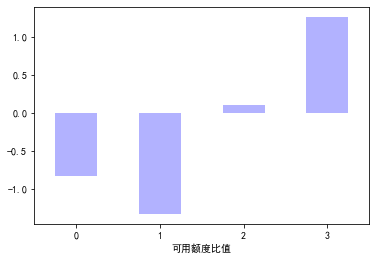

In [854]:
cut1_woe.plot.bar(color='b',alpha=0.3,rot=0)


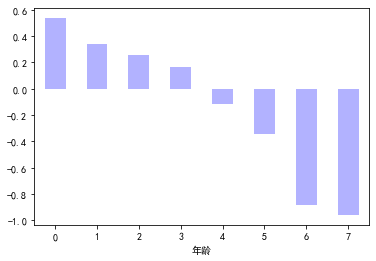

In [855]:
cut2_woe.plot.bar(color='b',alpha=0.3,rot=0)

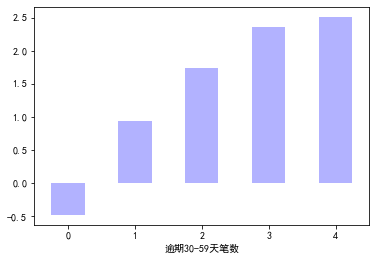

In [856]:
cut3_woe.plot.bar(color='b',alpha=0.3,rot=0)

cut1_IV: 0.8851409241467698


Text(0, 0.5, 'IV')

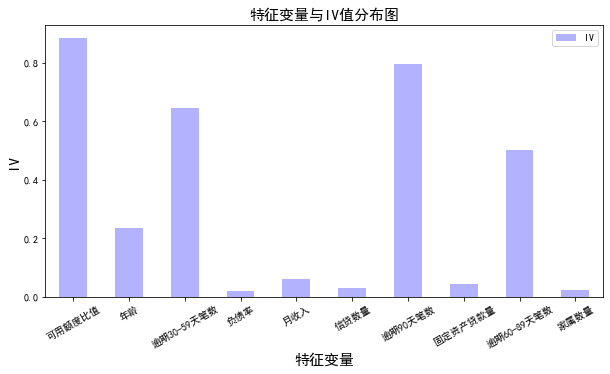

In [857]:
def get_IV_data(cut,cut_woe):
    grouped=df_train["好坏客户"].groupby(cut,as_index = True).value_counts()
    cut_IV=((grouped.unstack().iloc[:,1]/df_train["好坏客户"].sum()-
               grouped.unstack().iloc[:,0]/(df_train["好坏客户"].count()-df_train["好坏客户"].sum()))*cut_woe).sum()    
    return cut_IV

#计算各分组的IV值
cut1_IV=get_IV_data(cut1,cut1_woe)
cut2_IV=get_IV_data(cut2,cut2_woe)
cut3_IV=get_IV_data(cut3,cut3_woe)
cut4_IV=get_IV_data(cut4,cut4_woe)
cut5_IV=get_IV_data(cut5,cut5_woe)
cut6_IV=get_IV_data(cut6,cut6_woe)
cut7_IV=get_IV_data(cut7,cut7_woe)
cut8_IV=get_IV_data(cut8,cut8_woe)
cut9_IV=get_IV_data(cut9,cut9_woe)
cut10_IV=get_IV_data(cut10,cut10_woe)

print("cut1_IV:",cut1_IV)

IV=pd.DataFrame([cut1_IV,cut2_IV,cut3_IV,cut4_IV,cut5_IV,cut6_IV,cut7_IV,cut8_IV,cut9_IV,cut10_IV],index=
                ['可用额度比值','年龄','逾期30-59天笔数','负债率','月收入','信贷数量','逾期90天笔数','固定资产贷款量',
                 '逾期60-89天笔数','家属数量'],columns=['IV'])

iv=IV.plot.bar(color='b',alpha=0.3,rot=30,figsize=(10,5),fontsize=(10))

iv.set_title('特征变量与IV值分布图',fontsize=(15))
iv.set_xlabel('特征变量',fontsize=(15))

iv.set_ylabel('IV',fontsize=(15))

In [858]:
IV
# 一般选取IV大于0.02的特征变量进行后续训练，从以上可以看出所有变量均满足，所以选取全部的

,IV
可用额度比值,0.885141
年龄,0.233864
逾期30-59天笔数,0.645059
负债率,0.019070
月收入,0.059480
信贷数量,0.030604
逾期90天笔数,0.795681
固定资产贷款量,0.042140
逾期60-89天笔数,0.500667
家属数量,0.023332


In [859]:
# WOE值替换
df_new=pd.DataFrame()   #新建df_new存放woe转换后的数据
def replace_data(cut,cut_woe):
    a=[]
    for i in cut.unique():
        a.append(i)
        a.sort()
    print(a)
    for m in range(len(a)):
        cut.replace(a[m],cut_woe.values[m],inplace=True)
    print(cut)
    return cut

df_new["好坏客户"]=df_train["好坏客户"]
df_new["可用额度比值"]=replace_data(cut1,cut1_woe)
df_new["年龄"]=replace_data(cut2,cut2_woe)
df_new["逾期30-59天笔数"]=replace_data(cut3,cut3_woe)
df_new["负债率"]=replace_data(cut4,cut4_woe)
df_new["月收入"]=replace_data(cut5,cut5_woe)
df_new["信贷数量"]=replace_data(cut6,cut6_woe)
df_new["逾期90天笔数"]=replace_data(cut7,cut7_woe)
df_new["固定资产贷款量"]=replace_data(cut8,cut8_woe)
df_new["逾期60-89天笔数"]=replace_data(cut9,cut9_woe)
df_new["家属数量"]=replace_data(cut10,cut10_woe)

df_new

[0, 1, 2, 3]
1         1.263289
2         0.094005
3         0.094005
4         1.263289
5         0.094005
6         0.094005
7         0.094005
9         0.094005
10        0.094005
11       -1.339010
12       -1.339010
14       -1.339010
15        0.094005
17        0.094005
18        0.094005
19        0.094005
20        0.094005
21       -1.339010
23       -1.339010
24       -1.339010
25        0.094005
26       -1.339010
28        0.094005
29        0.094005
30        0.094005
32       -1.339010
34        0.094005
35       -0.839697
36        1.263289
37        1.263289
            ...   
149952   -1.339010
149953    0.094005
149954    1.263289
149956    1.263289
149958    0.094005
149959    0.094005
149960   -0.839697
149961    1.263289
149963    0.094005
149966   -1.339010
149969   -1.339010
149970   -1.339010
149971   -1.339010
149974    1.263289
149975   -1.339010
149976   -0.839697
149978    1.263289
149979    0.094005
149980   -1.339010
149983   -0.839697
149984   -1.339010

,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
1,0,1.263289,0.338024,-0.474556,-0.158902,0.311015,0.219753,-0.348056,0.201584,-0.244289,0.155482
2,0,0.094005,0.338024,0.939043,-0.158902,0.311015,0.219753,2.007076,0.201584,-0.244289,-0.117335
3,0,0.094005,0.539048,-0.474556,-0.158902,0.311015,0.219753,-0.348056,0.201584,-0.244289,-0.117335
4,0,1.263289,0.165041,0.939043,-0.158902,-0.331450,-0.221680,-0.348056,-0.232173,-0.244289,-0.117335
5,0,0.094005,-0.963991,-0.474556,-0.038914,0.311015,0.219753,-0.348056,-0.232173,-0.244289,0.155482
6,0,0.094005,-0.114971,-0.474556,0.172619,-0.165590,-0.221680,-0.348056,0.078820,-0.244289,-0.117335
7,0,0.094005,0.338024,-0.474556,-0.158902,0.311015,-0.221680,-0.348056,0.201584,-0.244289,-0.117335
9,0,0.094005,-0.114971,-0.474556,0.172619,-0.331450,-0.117269,-0.348056,0.477892,-0.244289,0.242144
10,0,0.094005,0.539048,-0.474556,-0.038914,0.311015,0.219753,-0.348056,0.201584,-0.244289,-0.117335
11,0,-1.339010,0.165041,-0.474556,-0.038914,-0.165590,-0.221680,-0.348056,-0.115575,-0.244289,0.242144


In [860]:
# logistic模型回归
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x=df_new.iloc[:,1:]
y=df_new.iloc[:,:1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=0)

print("x_train:",x_train)
print("x_test:",x_test)
print("y_train:",y_train)
print("y_test:",y_test)

model=LogisticRegression()
clf=model.fit(x_train,y_train)

print('测试成绩：{}'.format(clf.score(x_test,y_test)))

x_train:           可用额度比值        年龄  逾期30-59天笔数       负债率       月收入      信贷数量  \
27958   0.094005  0.338024   -0.474556 -0.038914 -0.165590 -0.117269   
111372 -1.339010  0.338024   -0.474556 -0.038914  0.311015 -0.221680   
37259   1.263289  0.539048   -0.474556 -0.158902  0.311015  0.219753   
83334   0.094005 -0.881277    0.939043  0.172619 -0.165590  0.006098   
34663  -0.839697 -0.881277    1.741291 -0.038914 -0.331450  0.006098   
112457  1.263289  0.257068   -0.474556  0.172619  0.311015 -0.117269   
75678  -1.339010 -0.114971   -0.474556 -0.158902 -0.331450 -0.221680   
117884 -0.839697  0.257068   -0.474556 -0.158902  0.311015  0.219753   
40035   1.263289  0.539048   -0.474556 -0.158902  0.311015  0.219753   
13903   0.094005 -0.963991   -0.474556  0.172619  0.078851  0.006098   
56644   0.094005 -0.881277   -0.474556 -0.038914 -0.165590 -0.117269   
3303    0.094005  0.257068   -0.474556 -0.038914 -0.331450 -0.117269   
117415 -1.339010 -0.114971   -0.474556 -0.038914  0.078

e:\program files\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
e:\program files\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


测试成绩：0.9448366522226009


In [861]:
# 求特征权值系数coe，后面训练结果转分值时会用到：

coe=clf.coef_        #特征权值系数，后面转换为打分规则时会用到
coe

array([[ 0.64684807,  0.51049941,  0.56940842,  1.15260525,  0.5165994 ,
        -0.1198784 ,  0.57001881,  0.62923423,  0.42703195,  0.37740627]])

In [862]:
y_pred=clf.predict(x_test)

In [863]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

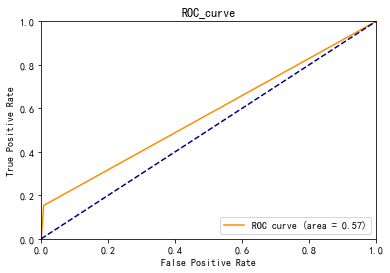

In [864]:
# 模型评估-[模型评估主要看AUC和K-S值]

from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

In [865]:
roc_auc 

0.5729766177927315

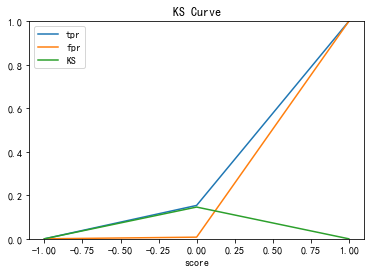

<Figure size 1440x1440 with 0 Axes>

In [866]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr, label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr, label='fpr')
ax.plot(1 - threshold, tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.ylim([0.0, 1.0])
plt.figure(figsize=(20,20))
legend = ax.legend(loc='upper left')
plt.show()

In [867]:
#ROC0.57， K-S值0.15左右，建模效果一般
max(tpr-fpr)

0.14595323558546286

In [868]:
# 模型结果转评分
# 假设好坏比为20的时候分数为600分，每高20分好坏比翻一倍
# 现在我们求每个变量不同woe值对应的分数刻度可得：

factor = 20 / np.log(2)
offset = 600 - 20 * np.log(20) / np.log(2)

def get_score(coe,woe,factor):
    scores=[]
    for w in woe:
        score=round(coe*w*factor,0)
        scores.append(score)
    return scores

print(coe)
x1 = get_score(coe[0][0], cut1_woe, factor)
x2 = get_score(coe[0][1], cut2_woe, factor)
x3 = get_score(coe[0][2], cut3_woe, factor)
x4 = get_score(coe[0][3], cut4_woe, factor)
x5 = get_score(coe[0][4], cut5_woe, factor)
x6 = get_score(coe[0][5], cut6_woe, factor)
x7 = get_score(coe[0][6], cut7_woe, factor)
x8 = get_score(coe[0][7], cut8_woe, factor)
x9 = get_score(coe[0][8], cut9_woe, factor)
x10 = get_score(coe[0][9], cut10_woe, factor)

print("可用额度比值对应的分数:{}".format(x1))
print("年龄对应的分数:{}".format(x2))
print("逾期30-59天笔数对应的分数:{}".format(x3))
print("负债率对应的分数:{}".format(x4))
print("月收入对应的分数:{}".format(x5))
print("信贷数量对应的分数:{}".format(x6))
print("逾期90天笔数对应的分数:{}".format(x7))
print("固定资产贷款量对应的分数:{}".format(x8))
print("逾期60-89天笔数对应的分数:{}".format(x9))
print("家属数量对应的分数:{}".format(x10))
print("\n")
print("可以看出分数越高，成为坏客户的可能性越大; \n像年龄越大坏客率越低，可用额度比值、逾期笔数这几个变量的分数跨度较大对最后的总分有更大的影响，\n这些都印证了前面探索分析的结果")

[[ 0.64684807  0.51049941  0.56940842  1.15260525  0.5165994  -0.1198784
   0.57001881  0.62923423  0.42703195  0.37740627]]
可用额度比值对应的分数:[-16.0, -25.0, 2.0, 24.0]
年龄对应的分数:[8.0, 5.0, 4.0, 2.0, -2.0, -5.0, -13.0, -14.0]
逾期30-59天笔数对应的分数:[-8.0, 15.0, 29.0, 39.0, 41.0]
负债率对应的分数:[-5.0, -1.0, 6.0]
月收入对应的分数:[5.0, 1.0, -2.0, -5.0]
信贷数量对应的分数:[-1.0, 1.0, 0.0, -0.0]
逾期90天笔数对应的分数:[-6.0, 33.0, 46.0, 53.0, 56.0]
固定资产贷款量对应的分数:[4.0, -4.0, -2.0, 1.0, 9.0]
逾期60-89天笔数对应的分数:[-3.0, 23.0, 33.0, 39.0]
家属数量对应的分数:[-1.0, 2.0, 3.0]


可以看出分数越高，成为坏客户的可能性越大; 
像年龄越大坏客率越低，可用额度比值、逾期笔数这几个变量的分数跨度较大对最后的总分有更大的影响，
这些都印证了前面探索分析的结果


In [869]:
# 计算用户总分
# 各变量对应的分数求和，算出每个用户的总分

def compute_score(series,bins,score):
#     print(score)
#     print(bins)
    list = []
    i = 0
    while i < len(series):
        value = series[i]
#         print(value)
        j = len(bins) - 2
        m = len(bins) - 2
#         print("j=",j)
#         print("m=",m)
        while j >= 0:
            if value >= bins[j]:
#               j = -1
                break
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list

path2=r'cs_test_data.csv'


test1 = pd.read_csv(path2)


test1['x1'] = pd.Series(compute_score(test1['RevolvingUtilizationOfUnsecuredLines'], bins1, x1))
test1['x2'] = pd.Series(compute_score(test1['age'], bins2, x2))
test1['x3'] = pd.Series(compute_score(test1['NumberOfTime30-59DaysPastDueNotWorse'], bins3, x3))
test1['x4'] = pd.Series(compute_score(test1['DebtRatio'], bins4, x4))
test1['x5'] = pd.Series(compute_score(test1['MonthlyIncome'],bins5, x5))
test1['x6'] = pd.Series(compute_score(test1['NumberOfOpenCreditLinesAndLoans'], bins6, x6))
test1['x7'] = pd.Series(compute_score(test1['NumberOfTimes90DaysLate'], bins7, x7))
test1['x8'] = pd.Series(compute_score(test1['NumberRealEstateLoansOrLines'], bins8, x8))
test1['x9'] = pd.Series(compute_score(test1['NumberOfTime60-89DaysPastDueNotWorse'], bins9, x9))
test1['x10'] = pd.Series(compute_score(test1['NumberOfDependents'], bins10, x10))

test1['Score'] = test1['x1']+test1['x2']+test1['x3']+test1['x4']+test1['x5']+test1['x6']+test1['x7']+test1['x8']+test1['x9']+test1['x10']+600
test1.to_csv(r'2019-06-27-ScoreData.csv', index=False)

In [870]:

score_data = pd.read_csv('2019-06-27-ScoreData.csv')
score_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,x2,x3,x4,x5,x6,x7,x8,x9,x10,Score
0,0,0.083266,56,0,1817.000000,8311.0,12,0,2,0,...,-2.0,15.0,-1.0,1.0,1.0,33.0,1.0,23.0,3.0,658.0
1,0,1.000000,41,0,2871.000000,8311.0,4,0,2,0,...,2.0,15.0,-1.0,1.0,-1.0,33.0,1.0,23.0,2.0,699.0
2,0,0.204373,48,0,0.665255,4250.0,7,0,2,0,...,2.0,15.0,-5.0,1.0,-1.0,33.0,1.0,23.0,3.0,647.0
3,0,0.248501,66,0,0.829828,4183.0,17,0,3,0,...,-5.0,15.0,-5.0,1.0,1.0,33.0,9.0,23.0,2.0,649.0
4,0,0.480532,25,0,2.600998,400.0,8,0,0,0,...,5.0,15.0,-5.0,5.0,-1.0,33.0,-4.0,23.0,2.0,648.0
5,0,0.444742,50,0,0.145329,37500.0,7,0,1,1,...,-2.0,15.0,-5.0,-2.0,-1.0,33.0,-2.0,33.0,3.0,647.0
6,0,0.250207,51,0,0.427692,9749.0,17,0,2,0,...,-2.0,15.0,-5.0,1.0,1.0,33.0,1.0,23.0,3.0,645.0
7,0,0.303891,42,0,0.470755,6000.0,6,0,1,0,...,2.0,15.0,-5.0,1.0,-1.0,33.0,-2.0,23.0,2.0,643.0
8,0,227.000000,78,0,0.003089,2913.0,4,0,0,0,...,-13.0,15.0,-5.0,1.0,-1.0,33.0,-4.0,23.0,2.0,675.0
9,1,0.569682,47,0,6.163152,900.0,11,0,2,0,...,2.0,15.0,-5.0,5.0,1.0,33.0,1.0,23.0,3.0,680.0
